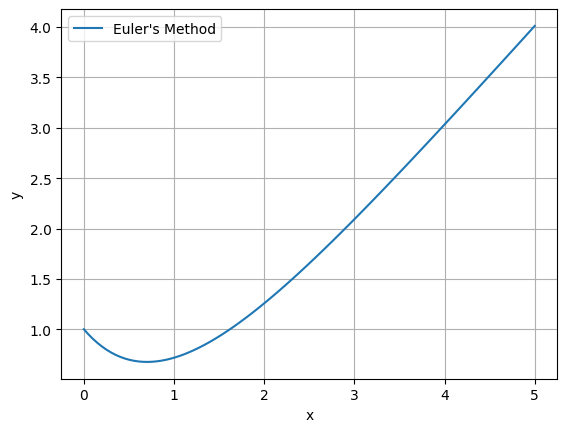

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation function
def differential_equation(x, y):
    return x - y

# Initial condition
x0 = 0
y0 = 1

# Define the range of x-values
x_range = np.linspace(0, 5, 100)  # Adjust the range as needed

# Step size
h = x_range[1] - x_range[0]

# Initialize arrays to store the results
y_values = [y0]

# Perform Euler's method
for x in x_range[:-1]:
    y_next = y_values[-1] + h * differential_equation(x, y_values[-1])
    y_values.append(y_next)

# Plot the numerical solution
plt.plot(x_range, y_values, label="Euler's Method")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()